In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from keras.optimizers import RMSprop,Adam
import keras.initializers

In [24]:
from numpy import linalg as LA
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [26]:
(trainclass, trainlabels), (testclass, testlabels) = mnist.load_data()
print(trainclass.shape)
trainclass = trainclass.reshape(len(trainclass),28*28)
testclass = testclass.reshape(len(testclass),28*28)
trainclass = trainclass[0:10000]
testclass = testclass[0:1000]
trainlabels = trainlabels[0:10000]
testlabels = testlabels[0:1000]
testclass = testclass/255
trainclass = trainclass/255
predtrain  = keras.utils.to_categorical(trainlabels,10)
predtest  = keras.utils.to_categorical(testlabels,10)
l = [10,1,0.1,0.01,0.0001,0.00001]
stores = []
for i in range(len(l)):
    epochs = 50
    Model = Sequential()
    Model.add(Dense(1000, activation='tanh', input_shape=(784,)))
    Model.add(Dense(1000, activation='tanh'))
    Model.add(Dense(10, activation='sigmoid'))
    Model.summary()
    Model.compile(loss='MSE',
              optimizer=keras.optimizers.SGD(lr=l[i], momentum=0.0, nesterov=False),
              metrics=['accuracy'])
    history = Model.fit(trainclass,predtrain,batch_size=128,epochs=epochs,validation_data=(testclass, predtest),verbose=0)
    stores.append(history)  

(60000, 28, 28)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
______

6


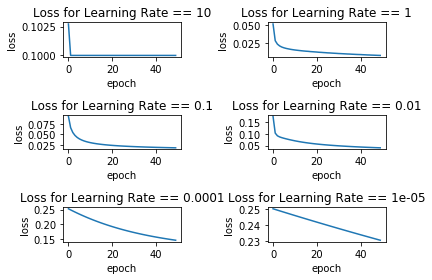

In [27]:
print(len(stores))
l = [10,1,0.1,0.01,0.0001,0.00001]
for i in range(len(stores)):
    plt.subplot(3,2,i+1)
    plt.tight_layout()
    plt.plot(stores[i].history['loss'])
#     plt.plot(store.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title("Loss for Learning Rate == " + str(l[i]))
#     plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model_uniform = Sequential()
model_uniform.add(Dense(1000, activation='tanh', input_shape=(784,),kernel_initializer=keras.initializers.RandomUniform(minval=0, maxval=1, seed=None)))
model_uniform.add(Dense(1000, activation='tanh'))
model_uniform.add(Dense(10, activation='sigmoid'))
model_uniform.summary()
model_uniform.compile(loss='MSE',
              optimizer=keras.optimizers.SGD(lr=1, momentum=0.0, nesterov=False),
              metrics=['accuracy'])
history = model_uniform.fit(trainclass,predtrain,batch_size=128,epochs=epochs,validation_data=(testclass, predtest),verbose=0) 
temp = []
temp.append(history)
model_uniform = Sequential()
model_uniform.add(Dense(1000, activation='tanh', input_shape=(784,),kernel_initializer=keras.initializers.RandomNormal(mean=0,stddev=1, seed=None)))
model_uniform.add(Dense(1000, activation='tanh'))
model_uniform.add(Dense(10, activation='sigmoid'))
model_uniform.summary()
model_uniform.compile(loss='MSE',
              optimizer=keras.optimizers.SGD(lr=1, momentum=0.0, nesterov=False),
              metrics=['accuracy'])
history = model_uniform.fit(trainclass,predtrain,batch_size=128,epochs=epochs,validation_data=(testclass, predtest),verbose=0) 
temp.append(history)
model_uniform = Sequential()
model_uniform.add(Dense(1000, activation='tanh', input_shape=(784,),kernel_initializer=keras.initializers.glorot_normal(seed=None)))
model_uniform.add(Dense(1000, activation='tanh'))
model_uniform.add(Dense(10, activation='sigmoid'))
model_uniform.summary()
model_uniform.compile(loss='MSE',
              optimizer=keras.optimizers.SGD(lr=1, momentum=0.0, nesterov=False),
              metrics=['accuracy'])
history = model_uniform.fit(trainclass,predtrain,batch_size=128,epochs=epochs,validation_data=(testclass, predtest),verbose=0) 
temp.append(history)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 1000)              785000    
_________________________________________________________________
dense_110 (Dense)            (None, 1000)              1001000   
_________________________________________________________________
dense_111 (Dense)            (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 1000)              785000    
_________________________________________________________________
dense_113 (Dense)            (None, 1000)              1001000   
____________________

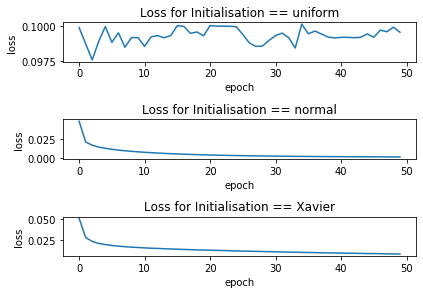

In [45]:
lr = ["uniform","normal","Xavier"]
for i in range(len(temp)):
    plt.subplot(3,1,i+1)
    plt.tight_layout()
    plt.plot(temp[i].history['loss'])
#     plt.plot(store.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title("Loss for Initialisation == " + str(lr[i]))
#     plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
import keras.callbacks.callbacks as calls
def exp_decay(epoch):
   initial_lrate = 0.1
   k = 0.8
   lrate = initial_lrate * np.exp(-k*epoch)
   return lrate

In [40]:
import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(exp_decay(len(self.losses)))

In [41]:
loss_history = LossHistory()
lrate = calls.LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lrate]
epochs = 50
Model = Sequential()
Model.add(Dense(1000, activation='tanh', input_shape=(784,)))
Model.add(Dense(1000, activation='tanh'))
Model.add(Dense(10, activation='sigmoid'))
Model.summary()
Model.compile(loss='MSE',
          optimizer=keras.optimizers.Adam(),
          metrics=['accuracy'])
history = Model.fit(trainclass,predtrain, 
   validation_data=(testclass, predtest), 
   epochs=epochs, 
   batch_size=128, 
   callbacks=callbacks_list, 
   verbose=2)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_38 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_39 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 1000 samples
Epoch 1/50
 - 3s - loss: 0.1094 - accuracy: 0.1003 - val_loss: 0.1000 - val_accuracy: 0.0850
Epoch 2/50
 - 2s - loss: 0.1000 - accuracy: 0.1001 - val_loss: 0.1000 - val_accuracy: 0.0850
Epoch 3/50
 - 2s - loss: 0.1000 - accuracy: 0.1001 - val_loss: 0.1000 - val_accuracy: 0.0850
Epoch 4/50
 - 2s - loss: 0.1000 - accuracy: 0

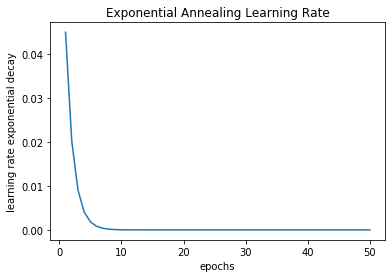

In [45]:
plt.plot([i+1 for i in range(epochs)],loss_history.lr)
plt.ylabel('learning rate exponential decay')
plt.xlabel('epochs')
plt.title("Exponential Annealing Learning Rate")
plt.show()